Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

import warnings

warnings.filterwarnings("ignore")

## EDA
- Q: Perform EDA and any data cleaning if necessary.

In [2]:
df =  pd.read_csv('Wholesale customers data.csv', na_values=',')
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Check for the shape of data

In [5]:
df.shape

(440, 8)

Check for null values in the dataset.

In [6]:
df.isnull().values.any()

False

There are no null values in the dataset.

In [7]:
print("Channel:",df['Channel'].unique())
print("Region:",df['Region'].unique())

Channel: [2 1]
Region: [3 1 2]


There are two channels and three regions in which the products are sold.

In [8]:
categorical = ['Channel', 'Region']
continuous = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

Check the distribution of data for both channels and regions.

In [9]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [10]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

The categorical features Region and Channel and their respective classes seem imbalanced.

Check for outliers

<AxesSubplot:>

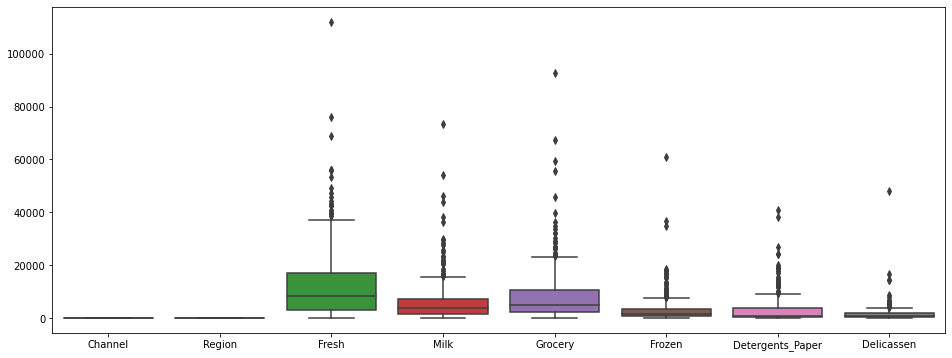

In [11]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df)

There are some outliers. We can either keep them (we presume the data is correct, or we can remove them). I have decided to remove them.

In [12]:
import itertools
outlier_list = []

for feature in df.columns:
    Q1 = np.percentile(df[feature],25)
    Q3 = np.percentile(df[feature],75)
    step = 1.5 * (Q3 - Q1)
    print("Data points considered outliers for the feature '{}':".format(feature))
    outlier_rows = df.loc[~((df[feature] >= Q1- step) & (df[feature] <= Q3 + step)),:]
    outlier_list.append(list(outlier_rows.index))
outliers = list(itertools.chain.from_iterable(outlier_list))
uniq_outliers = list(set(outliers))
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print('Outliers list:\n', uniq_outliers)
print('Length of outliers list:\n', len(uniq_outliers))
print('Duplicate list:\n', dup_outliers)
print('Length of duplicates list:\n', len(dup_outliers))
print('Original shape of data:\n', df.shape)

df = df.drop(df.index[dup_outliers]).reset_index(drop=True)

print('New shape of data:\n', df.shape)

Data points considered outliers for the feature 'Channel':
Data points considered outliers for the feature 'Region':
Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicassen':
Outliers list:
 [2, 4, 17, 22, 23, 24, 28, 29, 36, 38, 39, 40, 43, 45, 47, 49, 52, 56, 61, 65, 70, 71, 72, 73, 77, 85, 86, 87, 88, 91, 92, 93, 103, 109, 112, 125, 126, 129, 143, 145, 155, 163, 171, 173, 176, 181, 183, 195, 196, 200, 201, 202, 205, 209, 211, 216, 218, 230, 239, 240, 251, 254, 258, 259, 265, 277, 282, 283, 284, 285, 287, 289, 303, 304, 309, 310, 312, 319, 325, 328, 331, 333, 334, 337, 338, 339, 343, 349, 351, 358, 370, 371, 372, 377, 381, 384, 393, 401, 406, 409, 411, 413, 425, 427, 431, 435, 436, 437]


We have removed the outliers. There were 41 outliers from the original 440 observations. We removed values in the quartiles 0.75 and 0.25

Check the pairplot and visually analyse correlations

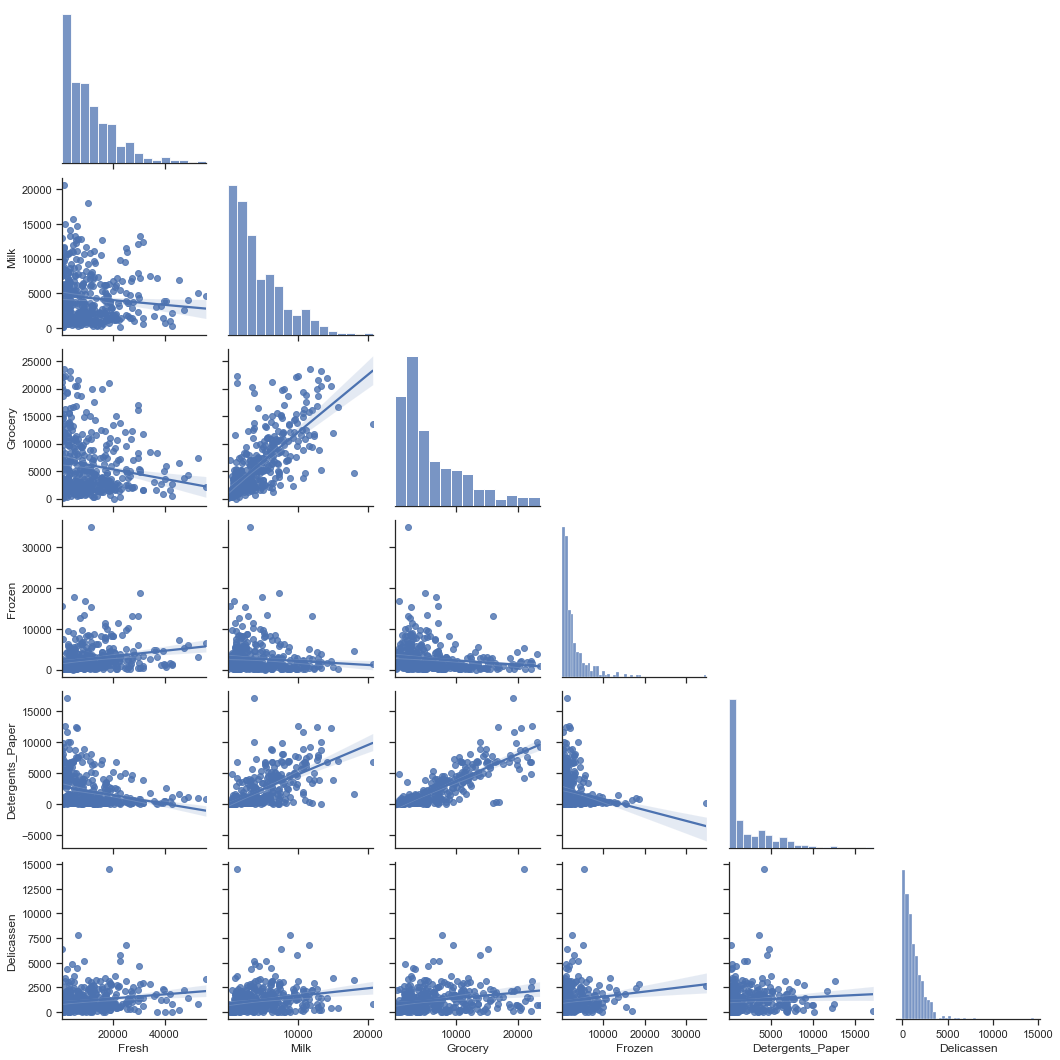

In [13]:
df_no_categorical = df[df.columns[+2:df.columns.size]]

sns.set(style="ticks")
g = sns.pairplot(df_no_categorical,corner=True,kind='reg')
g.fig.set_size_inches(15, 15)

There seems to be correlation between the Detergents_Paper and Grocery.

Let's use Pearson Correlation Coefficient to further examine this property.

Text(0.5, 1.0, 'Pearson correlation')

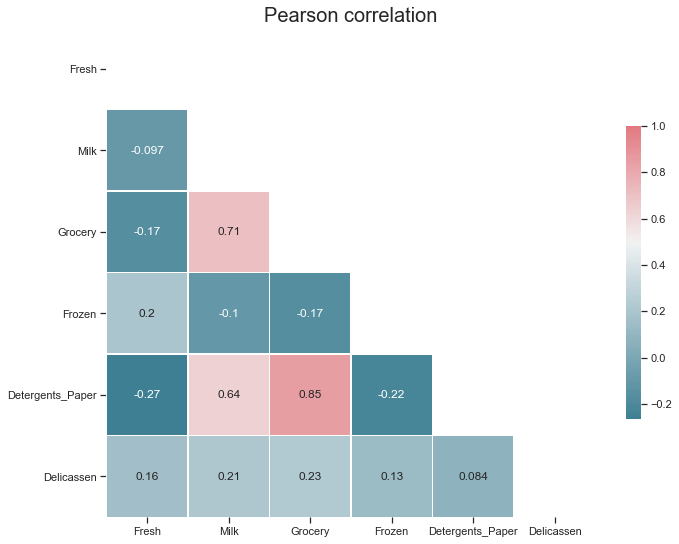

In [14]:
c = df_no_categorical.corr()
mask = np.triu(np.ones_like(c, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(c, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)

plt.title("Pearson correlation", fontsize = 20)

There is a strong positive correlation of ρ = 0.85 between Detergents_Paper and Grocery. There is moderate positive correlation between Detergents_Paper and Milk and between Milk and Grocery.

## Scaling
- Q: Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler
    and StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to
    why it was selected?

First, let's see how the histogram without scaling looks like.

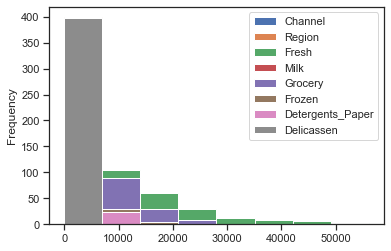

In [15]:
pd.DataFrame(df).plot(kind='hist', bins=8);

Use StandardScaler to scale the data and display head, to see how our data changed.

In [16]:
from sklearn.preprocessing import StandardScaler
df_no_cat_features = df.drop(['Channel','Region'], axis=1)
df_copy_1 = df_no_cat_features.copy() # Used with SS
df_copy_2 = df_no_cat_features.copy() # Used with MM

sc = StandardScaler()
scaled_data_1 = sc.fit_transform(df_copy_1)

df_scaled_1 = pd.DataFrame(scaled_data_1,columns=df_copy_1.columns)
df_scaled_1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.157841,1.490774,0.276217,-0.717356,0.230509,0.099439
1,-0.387967,1.533669,0.652984,-0.267192,0.460341,0.438603
2,-0.456436,1.254574,0.299307,-0.080205,0.543140,5.137344
3,0.215806,-0.865657,-0.350790,1.082719,-0.574087,0.447895
4,1.125162,0.308102,0.208072,0.358909,-0.102543,3.078354


Display the histogram of scaled dataframe.

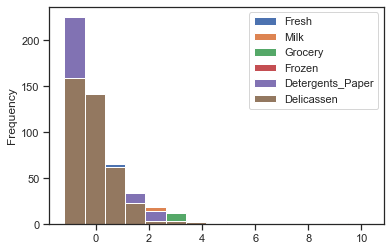

In [17]:
pd.DataFrame(df_scaled_1).plot(kind='hist', bins=15);

Display the KDE of scaled dataframe.

<AxesSubplot:ylabel='Density'>

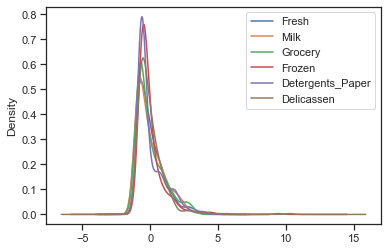

In [18]:
pd.DataFrame(df_scaled_1).plot(kind='kde')

In [19]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

scaled_data_2 = mm.fit_transform(df_copy_2)

df_scaled_2 = pd.DataFrame(scaled_data_2,columns=df_copy_2.columns)

df_scaled_2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.225856,0.466068,0.320349,0.005402,0.156044,0.092266
1,0.125785,0.473544,0.405417,0.049651,0.192207,0.122538
2,0.113231,0.424903,0.325563,0.068031,0.205235,0.541917
3,0.236484,0.055388,0.178782,0.182340,0.029444,0.123367
4,0.403210,0.259951,0.304963,0.111194,0.103640,0.358145


Display the histogram of scaled dataframe.

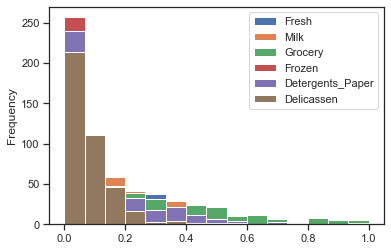

In [20]:
pd.DataFrame(df_scaled_2).plot(kind='hist', bins=15);

Display the KDE of scaled dataframe.

<AxesSubplot:ylabel='Density'>

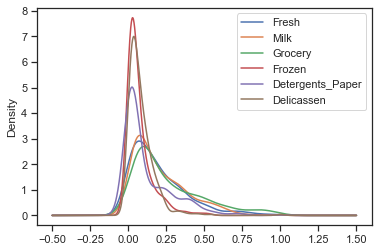

In [21]:
pd.DataFrame(df_scaled_2).plot(kind='kde')

Since we have removed the outliers, we do not take into account the use of RobustScaler, which would probably be worth looking into otherwise.

I have decided to use the StandardScaler. The data looks like they are from normal distribution, therefore the use of StandardScaler makes more sense than using MinMaxScaler. The algorithm scales the features to mean = 0 and standard deviation = 1. And since we removed the outliers, StandardScaler again makes more sense in this case.

**Look at the histograms of features.**

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

<Figure size 576x432 with 0 Axes>

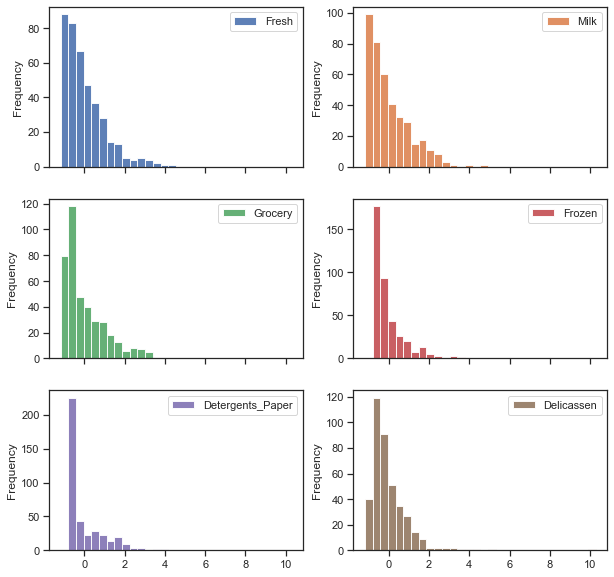

In [22]:
plt.figure(figsize=(8,6))
df_scaled_1.plot(kind='hist', alpha=0.9, bins=30, subplots=True, layout=(3,2), legend=True, figsize=(10,10))

Q: Find optimal number of features using RFECV and show the plot between Number of features
selected vs Cross validation score (use channel as target variable)

In [23]:
df_copy_ss = df.copy() # Used with SS

sc = StandardScaler()
df_scaled_data = sc.fit_transform(df_copy_ss)

df_ss = pd.DataFrame(df_scaled_data, columns=df_copy_ss.columns)

X = df_ss.drop(['Channel'], axis=1)
y = df['Channel']

# Convert channel (categorical feature) to binary.
df['Channel'].replace(to_replace=[2, 1], value=[1, 0], inplace=True) # has to be ran only once

y.head()

0    1
1    1
2    1
3    0
4    1
Name: Channel, dtype: int64

To assess which algorithm to use with REFC, we should first train the candidate models, in order to select the best one for the elimination of features based on score.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
(KNeighborsClassifier()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.9

In [26]:
from sklearn.ensemble import RandomForestClassifier
(RandomForestClassifier()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.9

Both algorithms performed the same. We will use the RFECV algorithm with RandomForrestClassifier and plot the result.

Let's use a pipeline to automatize the process of feature elimination.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
rf = RandomForestClassifier()
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', rf)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
n_scores = cross_val_score(pipeline, X,y, scoring='accuracy', cv=cv, n_jobs = -1)
np.mean(n_scores)

0.909846153846154

Fit the pipeline and print/plot the results.

In [28]:
pipeline.fit(X,y)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=RandomForestClassifier())),
                ('Model', RandomForestClassifier())])

In [29]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


In [30]:
rfecv_df = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_df.head(10)

,Rank
Region,1
Fresh,1
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1


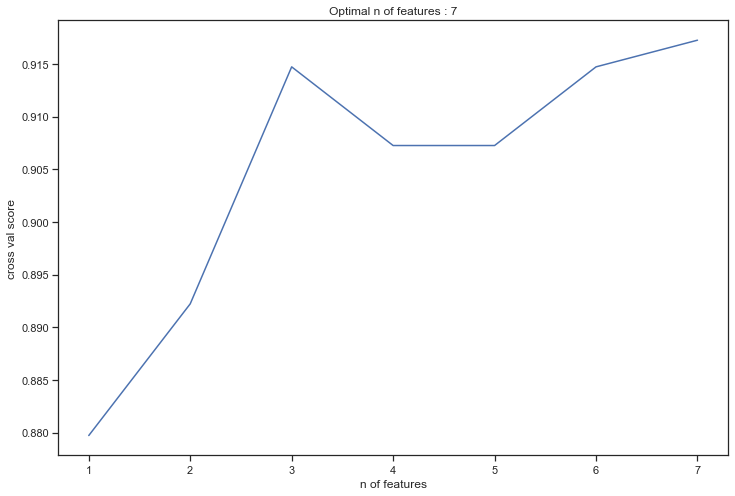

In [31]:
plt.figure(figsize=(12,8))
plt.xlabel("n of features")
plt.ylabel("cross val score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal n of features : %d" % rfecv.n_features_)
plt.show()

#### Q: Implement KMeans Clustering for K=2 to K=15 and based on elbow method identify what is the optimum number of clusters

In [32]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_ss)
    Sum_of_squared_distances.append(km.inertia_)

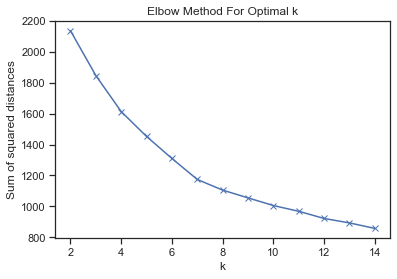

In [33]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It seems like the elbow is at k = 7. 

In [34]:
kmeans = KMeans(n_clusters = 7, random_state = 42)
y_means = kmeans.fit(df_ss)

In [35]:
pd.Series(kmeans.labels_).value_counts()

1    143
0     69
3     64
2     46
5     36
6     31
4     10
dtype: int64

In [36]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=100, random_state=0)
y_means = kmeans.fit(df_ss)

In [37]:
from sklearn.decomposition import PCA 

pca2 = PCA(n_components=2).fit(df_ss)
pca2d = pca2.transform(df_ss)

print("Explained variance is:", pca2.explained_variance_)
print("Explained variance ratio", pca2.explained_variance_ratio_)

Explained variance is: [3.29334333 1.34468479]
Explained variance ratio [0.41063617 0.16766433]


Explained variance: [3.29334333 1.34468479 1.01161058 0.80288225]
Explained variance ratio: [0.41063617 0.16766433 0.1261344  0.10010875]


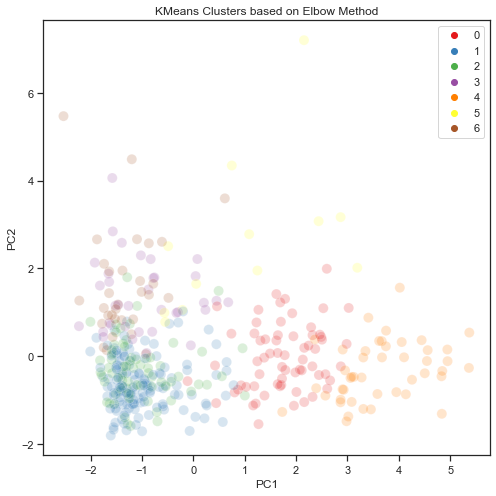

In [38]:
pca4 = PCA(n_components=4).fit(df_ss)
pca4d = pca4.transform(df_ss)

print("Explained variance:", pca4.explained_variance_)
print("Explained variance ratio:", pca4.explained_variance_ratio_)

plt.figure(figsize = (8,8))
sns.scatterplot(pca4d[:,0], pca4d[:,1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters based on Elbow Method', fontsize=12)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [39]:
def pca_results(data, pca):

    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)
    

Explained Variance Ratio => [0.41063617 0.16766433 0.1261344  0.10010875 0.09231353 0.05052574]

Explained Variance Ratio(csum) => [0.41063617 0.5783005  0.7044349  0.80454365 0.89685718 0.94738292]



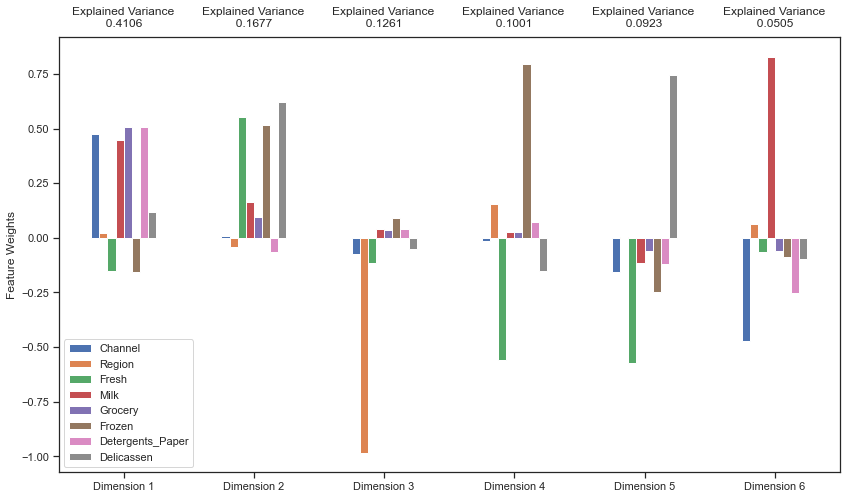

In [40]:
pca = PCA(n_components = 6, random_state=0)
pca.fit(df_ss)

print("Explained Variance Ratio => {}\n".format(pca.explained_variance_ratio_))
print("Explained Variance Ratio(csum) => {}\n".format(pca.explained_variance_ratio_.cumsum()))

pca_results = pca_results(df_ss, pca)

First 2 components explained variance: 0.5783 (sum of individual feature's explained variances)

First 4 components explained variance: 0.8045

The explained variance of the 2 first components is 57.8%

The explained variance of the 4 first components is 80.5%

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

model = XGBClassifier(eval_metric='logloss')
kfold = KFold(n_splits=5)

results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
Accuracy = results.mean()*100

model = XGBClassifier(eval_metric='logloss')
kfold = KFold(n_splits=5)

PW = cross_val_score(model, X, y, cv=kfold, scoring='precision_weighted')
Rscore = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')

Recall = (round((Rscore.mean()*100),3))
Precision = (round((PW.mean()*100),3))

f1score=round(2*((Recall*Precision)/(Recall+Precision)),3)

print("Accuracy= %f, Recall=%f, Precision=%f, f1score=%f" % (Accuracy,Recall,Precision,f1score))


Accuracy: 91.22% (3.27%)
Accuracy= 91.224684, Recall=91.225000, Precision=91.735000, f1score=91.479000
